In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
"""from sklearn.utils import resample
from sklearn.utils import shuffle"""
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np # linear algebra
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import GlobalMaxPooling1D, Conv1D, Dense, Embedding, Dropout,MaxPooling1D
import matplotlib.pyplot as plt
import numpy as np # linear algebra
from keras.callbacks import EarlyStopping

from keras import regularizers
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score
import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import tensorflow 
from tensorflow.python.lib.io import file_io


Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

../input/finaldata/YouTube_Dadvar_2014.csv
../input/finaldata/glove.6B.100d.txt


/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
data = pd.read_csv('../input/finaldata/YouTube_Dadvar_2014.csv')

In [3]:
data.head()

,UserIndex,Comments,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,Class,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(3464, 38)

In [5]:
data.ndim

2

In [6]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.shape

(3464, 9)

In [7]:
data.dtypes

UserIndex                object
Comments                 object
Number of Comments        int64
Number of Subscribers     int64
Membership Duration       int64
Number of Uploads         int64
Profanity in UserID       int64
Age                       int64
Class                     int64
dtype: object

In [8]:
data.isnull().any()

UserIndex                False
Comments                 False
Number of Comments       False
Number of Subscribers    False
Membership Duration      False
Number of Uploads        False
Profanity in UserID      False
Age                      False
Class                    False
dtype: bool

In [9]:
data.columns

Index(['UserIndex', 'Comments', 'Number of Comments', 'Number of Subscribers',
       'Membership Duration', 'Number of Uploads', 'Profanity in UserID',
       'Age', 'Class'],
      dtype='object')

In [10]:
data_dupli = data.drop_duplicates()
data=data_dupli
data.describe()

,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,Class
count,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.00000
mean,15.452367,304.318995,3.714781,10.288395,0.113164,24.879042,0.12067
std,10.862517,15520.532319,1.392837,28.646525,0.316839,13.286361,0.32579
min,1.000000,0.000000,2.000000,1.000000,0.000000,13.000000,0.00000
25%,6.000000,0.000000,3.000000,5.000000,0.000000,18.000000,0.00000
50%,14.000000,2.000000,3.000000,5.000000,0.000000,21.000000,0.00000
75%,23.000000,7.000000,4.000000,5.000000,0.000000,27.000000,0.00000
max,50.000000,912377.000000,9.000000,820.000000,1.000000,112.000000,1.00000


In [11]:
from sklearn.preprocessing import LabelEncoder
data['Class']=data['Class'].astype(str)
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

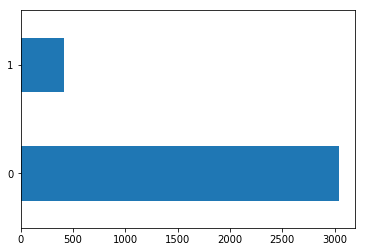

In [12]:
data['Class'].value_counts().plot(kind='barh')

In [13]:
import kernelprocess

df = kernelprocess.processing(data)
df.head()

,Comments,Class
0,do nebodyels hear crazi as screamin hoe every...,0
1,there mani thing incorrect comment unbeliev g...,0
2,hahah boyfriend show song me tooo be seizur o...,1
3,dick beyonc fuck as hole trueli dog bitch pha...,1
4,donghaetaemin kai a luhansehun bacon xd taemi...,0


In [14]:
from sklearn.utils import shuffle
file = shuffle(df, random_state=3)

In [15]:
Y = pd.DataFrame(file['Class'])
X = pd.DataFrame(file['Comments'])

In [16]:
def plot_model_history(model_history):
        fig, axs = plt.subplots(1,2,figsize=(15,5))
        # summarize history for accuracy
        axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
        axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
        axs[0].set_title('Model Accuracy')
        axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
        axs[0].legend(['train', 'test'], loc='best')
        # summarize history for loss
        axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
        axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
        axs[1].set_title('Model Loss')
        axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
        axs[1].legend(['train', 'test'], loc='best')
        plt.show()

In [17]:
tokenizer = Tokenizer(num_words=None, split=' ',lower=False)
tokenizer.fit_on_texts(X['Comments'].values)
x = tokenizer.texts_to_sequences(X['Comments'].values)
wordindex = tokenizer.word_index
vocab_size = len(wordindex) + 1
token = pad_sequences(x, padding  = 'post', maxlen = 2303) #max comment length

In [18]:
import keras.backend as K
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


# load whole embedding into memory
print('Indexing word vectors.')
    
embeddings_index = {}
f = file_io.FileIO('../input/finaldata/glove.6B.100d.txt', mode='r')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
    
print('Found %s word vectors.' % len(embeddings_index))
#emb_dim could be a parameter
    
all_embs = np.stack(embeddings_index.values())
emb_mean = all_embs.mean() 
emb_std = all_embs.std() 
emb_mean,emb_std
emb_dim=100
embedding_matrix = np.random.normal(emb_mean, emb_std, (vocab_size, emb_dim ))
for word, i in wordindex.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector


Indexing word vectors.
Found 400000 word vectors.


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=4, random_state=42)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 2303, 100)         4123400   
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 2299, 92)          46092     
_________________________________________________________________
global_max_pooling1d_25 (Glo (None, 92)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                930       
_________________________________________________________________
dropout_25 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 11        
Total params: 4,170,433
Trainable params: 47,033
Non-trainable params: 4,123,400
_____________________________________________________________

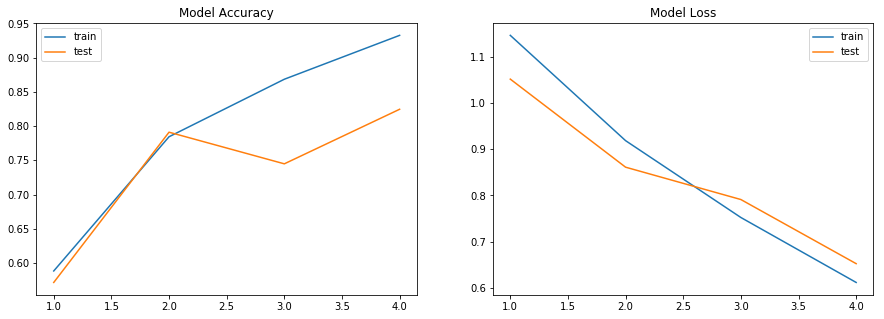

-----RandomOverSampling-----
CNN Accuracy Score ->  82.44803695150115
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       760
           1       0.26      0.23      0.24       106

    accuracy                           0.82       866
   macro avg       0.57      0.57      0.57       866
weighted avg       0.82      0.82      0.82       866

[[690  70]
 [ 82  24]]


In [29]:
#def CNNmodel(x_train, x_test, y_train, y_test, vocab_size, embedding_matrix):
y=Y['Class'].values  
cvscores = []
for train, test in cv.split(token):  
    #print("TRAIN:", train, "Test:", test)
    Xtrain, Xtest = token[train], token[test]
    Ytrain, Ytest = y[train], y[test]
    #ramdomOverSample
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler()
    x_ros, y_ros = ros.fit_sample(Xtrain, Ytrain)   
    
    seed = 129
    np.random.seed(seed)
    model = Sequential()
    model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], trainable=False, input_length = x_ros.shape[1]))
    model.add(Conv1D(92,5, activation='tanh'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(10, activation='tanh', kernel_regularizer = regularizers.l2(0.03)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=(['accuracy', mean_pred]))#sentropy',loss= imbalancedloss
    model.summary()
    
    batch_size = 110
    epochs =   4
    model_history = model.fit(x_ros, y_ros, validation_data=(Xtest, Ytest),epochs=epochs, batch_size=batch_size, verbose=1)
    CNN = model.predict_classes(Xtest)
    
scores = model.evaluate(Xtest, Ytest, verbose=0)
cvscores.append(scores[1] * 100)

plot_model_history(model_history)
print("-----RandomOverSampling-----")
print("CNN Accuracy Score -> ",(np.mean(cvscores)))
print(classification_report(Ytest, CNN))
print(confusion_matrix(Ytest,CNN))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 2303, 100)         4123400   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 2299, 92)          46092     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 92)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                930       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 4,170,433
Trainable params: 47,033
Non-trainable params: 4,123,400
_____________________________________________________________

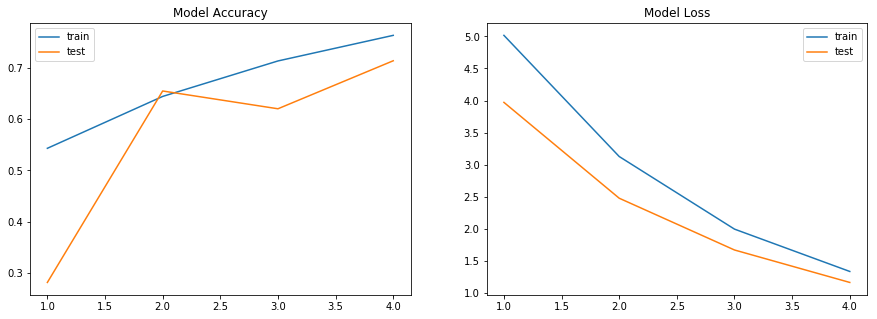

-----SMOTE-----
CNN Accuracy Score ->  71.36258660508084
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       760
           1       0.14      0.26      0.18       106

    accuracy                           0.71       866
   macro avg       0.51      0.52      0.51       866
weighted avg       0.79      0.71      0.75       866

[[590 170]
 [ 78  28]]


In [21]:
 
cvscores = []
for train, test in cv.split(token):  
    #print("TRAIN:", train, "Test:", test)
    Xtrain, Xtest = token[train], token[test]
    Ytrain, Ytest = y[train], y[test]
    #smote
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(Xtrain, Ytrain)    
    
    seed = 120
    np.random.seed(seed)
    model = Sequential()
    model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], trainable=False, input_length = X_train_res.shape[1]))
    model.add(Conv1D(92, 5, activation='tanh'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(10, activation='tanh', kernel_regularizer = regularizers.l2(0.3)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=(['accuracy', mean_pred]))#sentropy',loss= imbalancedloss
    model.summary()
    batch_size = 110
    epochs = 4
    model_history = model.fit(X_train_res,y_train_res, validation_data=(Xtest, Ytest),epochs=epochs, batch_size=batch_size, verbose=1)
    
    CNN = model.predict_classes(Xtest)
        
scores = model.evaluate(Xtest, Ytest, verbose=0)
cvscores.append(scores[1] * 100)
plot_model_history(model_history)
print("-----SMOTE-----")
print("CNN Accuracy Score -> ", (np.mean(cvscores)))

print(classification_report(Ytest, CNN))
print(confusion_matrix(Ytest,CNN))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 2303, 100)         4123400   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 2299, 92)          46092     
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 92)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                930       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 11        
Total params: 4,170,433
Trainable params: 47,033
Non-trainable params: 4,123,400
_____________________________________________________________

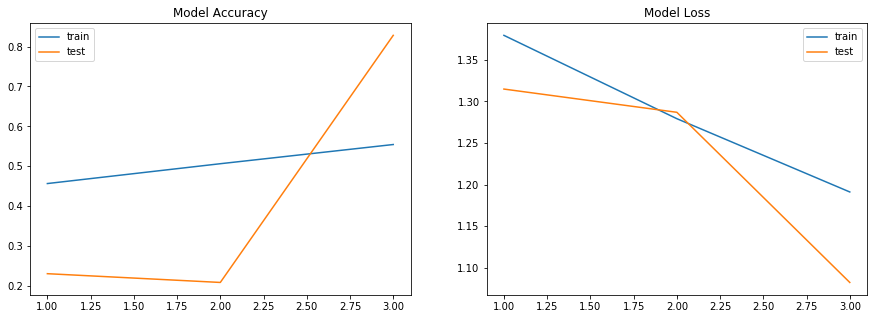

-----RandomUnderSampling-----
CNN Accuracy Score ->  82.7944572748268
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       760
           1       0.24      0.19      0.21       106

    accuracy                           0.83       866
   macro avg       0.57      0.55      0.56       866
weighted avg       0.81      0.83      0.82       866

[[697  63]
 [ 86  20]]


In [22]:
 
cvscores = []
for train, test in cv.split(token):  
    #print("TRAIN:", train, "Test:", test)
    Xtrain, Xtest = token[train], token[test]
    Ytrain, Ytest = y[train], y[test]
    #ramdomUnderSample
    from imblearn.under_sampling import RandomUnderSampler

    rus = RandomUnderSampler()
    x_rus, y_rus = rus.fit_sample(Xtrain, Ytrain)  
    
    seed = 120
    np.random.seed(seed)
    model = Sequential()
    model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], trainable=False, input_length = x_rus.shape[1]))
    model.add(Conv1D(92, 5, activation='tanh'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(10, activation='tanh', kernel_regularizer = regularizers.l2(0.03)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=(['accuracy', mean_pred]))#sentropy',loss= imbalancedloss
    model.summary()
    batch_size = 110
    epochs = 3
        
    model_history = model.fit(x_rus, y_rus, validation_data=(Xtest, Ytest),epochs=epochs, batch_size=batch_size, verbose=1)
    CNN = model.predict_classes(Xtest)
        
scores = model.evaluate(Xtest, Ytest, verbose=0)
cvscores.append(scores[1] * 100)
plot_model_history(model_history)
print("-----RandomUnderSampling-----")
print("CNN Accuracy Score -> ", (np.mean(cvscores)))

print(classification_report(Ytest, CNN))
print(confusion_matrix(Ytest,CNN))


In [23]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=4, random_state=42)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 2303, 100)         4123400   
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 2299, 92)          46092     
_________________________________________________________________
global_max_pooling1d_13 (Glo (None, 92)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                930       
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 4,170,433
Trainable params: 47,033
Non-trainable params: 4,123,400
_____________________________________________________________

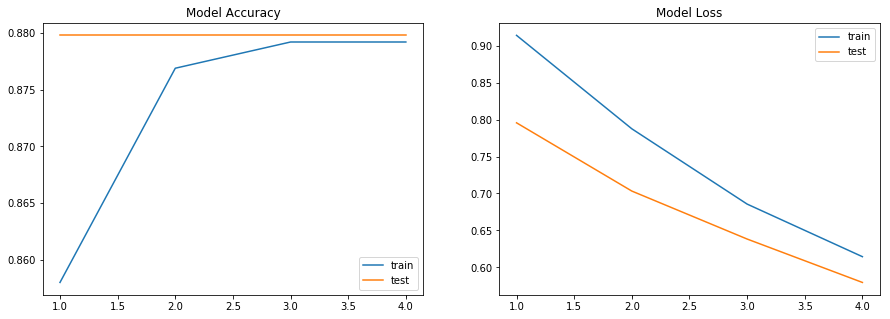

-----StratifiedKFold-----
CNN Accuracy Score ->  87.97687861271676
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       761
           1       0.00      0.00      0.00       104

    accuracy                           0.88       865
   macro avg       0.44      0.50      0.47       865
weighted avg       0.77      0.88      0.82       865

[[761   0]
 [104   0]]


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
 
cvscores = []
for train, test in cv.split(token,y):  
    #print("TRAIN:", train, "Test:", test)
    Xtrain, Xtest = token[train], token[test]
    Ytrain, Ytest = y[train], y[test]
     
    
    seed = 120
    np.random.seed(seed)
    model = Sequential()
    model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], trainable=False, input_length = Xtrain.shape[1]))
    model.add(Conv1D(92, 5, activation='tanh'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(10, activation='tanh', kernel_regularizer = regularizers.l2(0.03)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=(['accuracy', mean_pred]))#sentropy',loss= imbalancedloss
    model.summary()
    batch_size = 110
    epochs = 4
        
    model_history = model.fit(Xtrain,Ytrain, validation_data=(Xtest, Ytest),epochs=epochs, batch_size=batch_size, verbose=1)
    
    CNN = model.predict_classes(Xtest)
        
scores = model.evaluate(Xtest, Ytest, verbose=0)
cvscores.append(scores[1] * 100)
plot_model_history(model_history)
print("-----StratifiedKFold-----")
print("CNN Accuracy Score -> ", (np.mean(cvscores)))

print(classification_report(Ytest, CNN))
print(confusion_matrix(Ytest,CNN))
